# Homework 4

First, we import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import the data to dataframe *df*:

In [2]:
# must use full path
df=pd.read_excel('C:\\Users\\DU HAIZHOU\\BITA\\HW4\\GermanCredit.xlsx')

In [3]:
df.head()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
OBS#                1000 non-null int64
CHK_ACCT            1000 non-null int64
DURATION            1000 non-null int64
HISTORY             1000 non-null int64
NEW_CAR             1000 non-null int64
USED_CAR            1000 non-null int64
FURNITURE           1000 non-null int64
RADIO/TV            1000 non-null int64
EDUCATION           1000 non-null int64
RETRAINING          1000 non-null int64
AMOUNT              1000 non-null int64
SAV_ACCT            1000 non-null int64
EMPLOYMENT          1000 non-null int64
INSTALL_RATE        1000 non-null int64
MALE_DIV            1000 non-null int64
MALE_SINGLE         1000 non-null int64
MALE_MAR_or_WID     1000 non-null int64
CO-APPLICANT        1000 non-null int64
GUARANTOR           1000 non-null int64
PRESENT_RESIDENT    1000 non-null int64
REAL_ESTATE         1000 non-null int64
PROP_UNKN_NONE      1000 non-null int64
AGE           

In [5]:
df.drop('OBS#',axis=1).describe()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.577000,20.903000,2.54500,0.234000,0.103000,0.181000,0.280000,0.050000,0.097000,3271.258000,...,35.546000,0.186000,0.179000,0.713000,1.407000,1.904000,1.155000,0.404000,0.037000,0.700000
std,1.257638,12.058814,1.08312,0.423584,0.304111,0.385211,0.449224,0.218054,0.296106,2822.736876,...,11.375469,0.389301,0.383544,0.452588,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,...,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1365.500000,...,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,18.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.500000,...,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,24.000000,4.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3972.250000,...,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,72.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18424.000000,...,75.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


## Question 1

High risk leads to bad credit ratings. From the description of the data, the roles of predict variables in the decision are:

* CHK_ACCT: The status of the applicant's check account. One has a checking account with more DM should have less risk, but if one has no checking account, the risk may be high.
* DURATION: The duration of the applicant's credit. The longer duration of credit, the less risk.
* NEW_CAR/USED_CAR/FURNITURE/RADIO/TV/EDUCATION/RETRAINING: The purpose of the credit. It seems that different purpose may have different level of risk.
* AMOUNT: Amount of the credit. The smaller the value is, the less risk.
* SAV_ACCT: Average balance in savings account. One has more balance in savings account should have less risk, and if one don't have savings account or the status is unknown, the risk is high.
* EMPLOYMENT: The present employment period. The longer the period, the less risk.
* INSTALL_RATE: Installment rate as % of disposable income. The lower the rate, the less risk.
* MALE_DIV: Applicant is male and divorced. If this happen, there will be more risk.
* MALE_SINGLE: Applicant is male and single. If this happen, there will be more risk.
* MALE_MAR_WID: Applicant is male and married or a widower. If this happen, there will be less risk. 
* CO-APPLICANT: Application has a co-applicant. With a co-applicant, there will be less risk.
* GUARANTOR: Applicant has a guarantor. With a guarantor, there will be less risk.
* PRESENT_RESIDENT: Years of present resident of applicant. The more the years, the less risk.
* REAL_ESTATE: Applicant owns real estate. If this happen, there will be less risk.
* PROP_UNKN_NON: Applicant owns no property (or unknown). If this happen, there will be more risk.
* AGE: Age of applicant in years. It seems when an applicant is too young or too old, there will be more risk.
* OTHER_INSTALL: Applicant has other installment plan credit. If this happen, there will be less risk.
* RENT: Applicant rents. If this happen, there will be more risk.
* OWN_RES: Applicant owns residence. If this happen, there will be less risk.
* NUM_CREDITS: Number of existing credits at this bank. The more the credits, the less risk.
* JOB: Nature of job of applicant. The higher level of the job, the less risk.
* NUM_DEPENDENTS: Number of people for whom liable to provide maintenance. The less the number, the less risk.
* TELEPHONE: Applicant has phone in his or her name. If this happen, there will be less risk.
* FOREIGN: The applicant is a foreign worker. If this happen, there will be more risk.

We can count the corralation coefficient of the predictor variables and the response of credit rating:

In [6]:
df.drop('OBS#',axis=1).corr()['RESPONSE'].sort_values(ascending=False)

RESPONSE            1.000000
CHK_ACCT            0.350847
HISTORY             0.228785
SAV_ACCT            0.178943
OWN_RES             0.134589
REAL_ESTATE         0.119300
EMPLOYMENT          0.116002
RADIO/TV            0.106922
USED_CAR            0.099791
AGE                 0.091127
FOREIGN             0.082079
MALE_SINGLE         0.080677
GUARANTOR           0.055039
NUM_CREDITS         0.045732
TELEPHONE           0.036466
MALE_MAR_or_WID     0.019630
NUM_DEPENDENTS      0.003015
PRESENT_RESIDENT   -0.002967
FURNITURE          -0.020971
JOB                -0.032735
RETRAINING         -0.036129
MALE_DIV           -0.050063
CO-APPLICANT       -0.062728
EDUCATION          -0.070088
INSTALL_RATE       -0.072404
RENT               -0.092785
NEW_CAR            -0.096900
OTHER_INSTALL      -0.113285
PROP_UNKN_NONE     -0.125750
AMOUNT             -0.154739
DURATION           -0.214927
Name: RESPONSE, dtype: float64

We can see that the corralation coefficient of some variables are to the different direction as we expect, such as *DURATION* and *PROP_UNKN_NONE*, and most of the variables doesn't have strong corralation with the credit ratings, since the credit rating is not only affected by one or several of the variables. So, we need to build a model by using these variables to predict the credit ratings.

## Question 2

**Build a simple Logistic Regression model:**

Import the necessary packages:

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.pipeline import Pipeline

Define X and y:

In [8]:
X=df.drop(['OBS#','RESPONSE'],axis=1)
y=df[['RESPONSE']]

Divide the data into training set (60%) and testing set (40%):

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

Build the logistic regression model, and fit the model using training data set:

In [10]:
logreg=LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)

C:\datascience\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Use the testing data set to predict y, and save the result in *y_pred*:

In [11]:
y_pred=logreg.predict(X_test)

Print the confusion matrix and classification report of the real y (y_test) and predicted y (y_pred):

In [12]:
print(confusion_matrix(y_test,y_pred))

[[ 52  66]
 [ 24 258]]


In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.44      0.54       118
           1       0.80      0.91      0.85       282

   micro avg       0.78      0.78      0.78       400
   macro avg       0.74      0.68      0.69       400
weighted avg       0.76      0.78      0.76       400



In this case, from the opportunity cost matrix and the the payoff matrix:

* If we predict good as good (TP), we will gain \$100 for each.
* If we predict bad as good (FN), we will cost \$500 for each.
* If we predict good as bad (FP), we will have a oppotunity cost of $100 for each.
* If we predict bad as bad (TN), we will have no cost and no gain.

So, we should focus more on TP, FN and FP, and we can use the precision and recall of class 1 (good).

Precision is more important than recall, since the cost of each FN is 5 times the gain of each TP.

The precision of class 1 is 0.8, and the recall of class 1 is 0.91. The recall is greater than the precision, so this model may be not good enough.

Use *roc_curve* function to draw ROC curve:

In [14]:
tpr,fpr,threshold=roc_curve(y_test,logreg.predict_proba(X_test)[:,1])

Text(0.5, 1.0, 'ROC Curve')

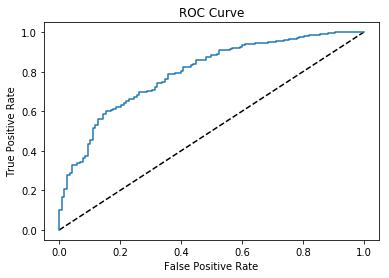

In [15]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(tpr,fpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

Count the AUC score:

In [16]:
roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1])

0.7942360860680371

The ROC curve of the model is a two-segment line. It's above the *tpr=fpr* line, and there is still some distance from the top left corner, so the model is useful in prediction, and the effect is acceptable.

The auc score is about 0.79, which means the same as above.

## Question 3

**Count the net profit on validation data:**

In [17]:
print('net profit:',confusion_matrix(y_test,y_pred)[1][1]*100-confusion_matrix(y_test,y_pred)[0][1]*500)

net profit: -7200


The net profit is less than 0, so the model may be not good enough.

## Question 4

**Change original cutoff value:**

### Part a

First, we need to count the predicted probability, and save the result in *prob*:

In [18]:
prob=logreg.predict_proba(X_test)[:,1]

If we want to relate the probability to the actual response, we can put them in one dataframe *df1*, and then sort the dataframe by the probability in descending order:

In [19]:
df1=y_test
df1['Probability']=prob
df1=df1.sort_values(by=['Probability'],ascending=False).reset_index(drop=True)
df1.head()

C:\datascience\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,RESPONSE,Probability
0,1,0.991977
1,1,0.991387
2,1,0.988524
3,1,0.987389
4,1,0.987274


### Part b

We count the gain/cost of each case, and save the result in *gain* column:

In [20]:
df1['gain']=df1['RESPONSE'].apply(lambda x: 100 if x==1 else -500)

### Part c

We count the cumulative net profit, and save the result in *cumulative profit* column:

In [21]:
df1['cumulative profit']=df1['gain'].cumsum()

### Part d

Then, we can find the maximum cumulative net profit:

In [22]:
df1[df1['cumulative profit']==df1['cumulative profit'].max()]

,RESPONSE,Probability,gain,cumulative profit
172,1,0.826912,100,8300


The maximum cumulative profit in this validation data is 8300, and it is at about 43.3% (173/400) of the data. The predicted probability of the data is 0.826912.

### Part e

**If this logistic regression model is scored to future applicants, we can use cross validation to get the optimal cutoff value.**

First, define functions that are useful:

* The predict function using cutoff value:

In [23]:
def cutoff_predict(classfier, X, cutoff):
    pred=[1 if i>cutoff else 0 for i in classfier.predict_proba(X)[:,1]]
    return pred

* The net profit calculation function:

In [24]:
def net_profit(y_test,y_pred):
    return confusion_matrix(y_test,y_pred)[1][1]*100-confusion_matrix(y_test,y_pred)[0][1]*500

* The function used as scoring parameter in cross validation:

In [25]:
def custom_score(cutoff):
    def net_profit_cutoff(clf, X, y):
        y_pred = cutoff_predict(clf, X, cutoff)
        return net_profit(y, y_pred)
    return net_profit_cutoff

Then, we make cross validation, and calculate the cv scores for different cutoff value:

In [26]:
X=df.drop(['OBS#','RESPONSE'],axis=1)
y=df['RESPONSE']
logreg=LogisticRegression(solver='liblinear')
scores=[cross_val_score(logreg,X,y,scoring=custom_score(c),cv=10) for c in np.arange(0.5,1,0.01)]

Draw the boxplot of the cv scores of different cutoff values:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

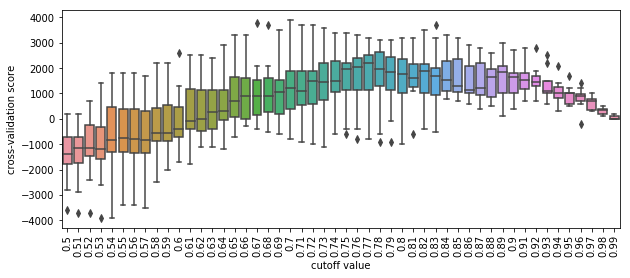

In [27]:
plt.figure(figsize=(10,4))
sns.boxplot(x=np.arange(0.5,1,0.01).round(2),y=scores)
plt.xlabel('cutoff value')
plt.ylabel('cross-validation score')
plt.xticks(rotation=90)

From the plot, we can use the box of cv scores to get the optimal cutoff value.

If we want to have more net profit, we focus more on the median value and the box part, and the optimal cutoff value can be from 0.75 to 0.84.